In [6]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

%matplotlib inline

# specify the path
path = '/Users/philhuang/Desktop/FDI/bunching_code/Our_bunching/final_codes/outputJune122023'

In [7]:
# Define a function to get the stars that shows the level of significance. 

def get_stars(stat):
    if abs(stat)< 1.645:
        s=''
    elif (abs(stat)>= 1.645) & (abs(stat) < 1.960):
        s='*'
    elif (abs(stat)>= 1.960) & (abs(stat) < 2.576):
        s='**'
    elif abs(stat)>= 2.576:
        s='***'
    return s

In [8]:
# Define a function to draw the graph.
def get_graph(year):
    
    ## Get model choice.
    model_choice = pd.read_excel(path+'/R4_'+year+'.xlsx')

    end   = 0.99
    start = np.array(model_choice.minD)[0]
    ub    = np.array(model_choice.Dp)[0]
    lb    = np.array(model_choice.Dm)[0]
    pval  = "%6.4f"%(model_choice.pval)[0]
    disc  = 0.25

    ## Get Statistics
    statistics = pd.read_excel(path+'/R3_'+year+'.xlsx')

    frac_nb       = np.array(statistics.frac_nb)[0]
    std_frac_nb_B = np.array(statistics.std_frac_nb_B)[0]
    t_frac_nb_B   = np.array(statistics.t_frac_nb_B)[0]
    Dd            = np.array(statistics.Dd)[0]
    std_Dd_B      = np.array(statistics.std_Dd_B)[0]
    t_Dd_B        = np.array(statistics.t_Dd_B)[0]

    s1 = get_stars(t_frac_nb_B)
    s2 = get_stars(t_Dd_B)

    ITT_k = '%5.3f'%(Dd) +'('+'%5.3f'%(std_Dd_B)+')' + s2
    a_f_k = '%5.3f'%(frac_nb) +'('+'%5.3f'%(std_frac_nb_B)+')' + s1
    
    ## Specify the xticks for the gragh
    ticks=np.arange(0,11,1)/10

    ## Draw the graph.
    numbers = pd.read_excel(path+'/R2_'+year+'.xlsx')
    numbers = numbers[numbers['R2_bins']<= end].copy()

    all_bins = np.array(numbers['R2_bins'])
    h1 = np.array(numbers['R2_C_all'])
    h0 = np.array(numbers['h'])


    fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=500)
    ax.set(xticks=ticks)
    ax.set_xlabel('Foreign Ownership (Pre 2008)', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    
    ax.plot(all_bins, h0, c='k', linestyle='solid', linewidth=1.0, label= '$f_{0}$'+'(D): Counterfactual Density')
    ax.plot(all_bins, h1, c='k', linestyle='dashed', linewidth=1.0, label='$f_{1}$'+'(D): Density With Notch')
    ax.axhline(y=0.10, linewidth=1.0, alpha=0.2)
    ax.axhline(y=0, linewidth=1.0, alpha=0.2)
    ax.axvline(x=lb, c='r', linestyle=':', linewidth=1.0 )
    ax.axvline(x=ub, c='r', linestyle=':', linewidth=1.0 )
    #ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),ncol=1, frameon=False)
    ax.legend()
    plt.text(0.65,0.09, '$\Delta$'+'d={0}'.format(ITT_k), fontsize = 10)
    plt.text(0.65,0.082, 'P-value (M=B) ={0}'.format(pval), fontsize = 10)
    plt.text(0.65,0.074, 'Frictions: a ={}'.format(a_f_k), fontsize = 10)

    return fig

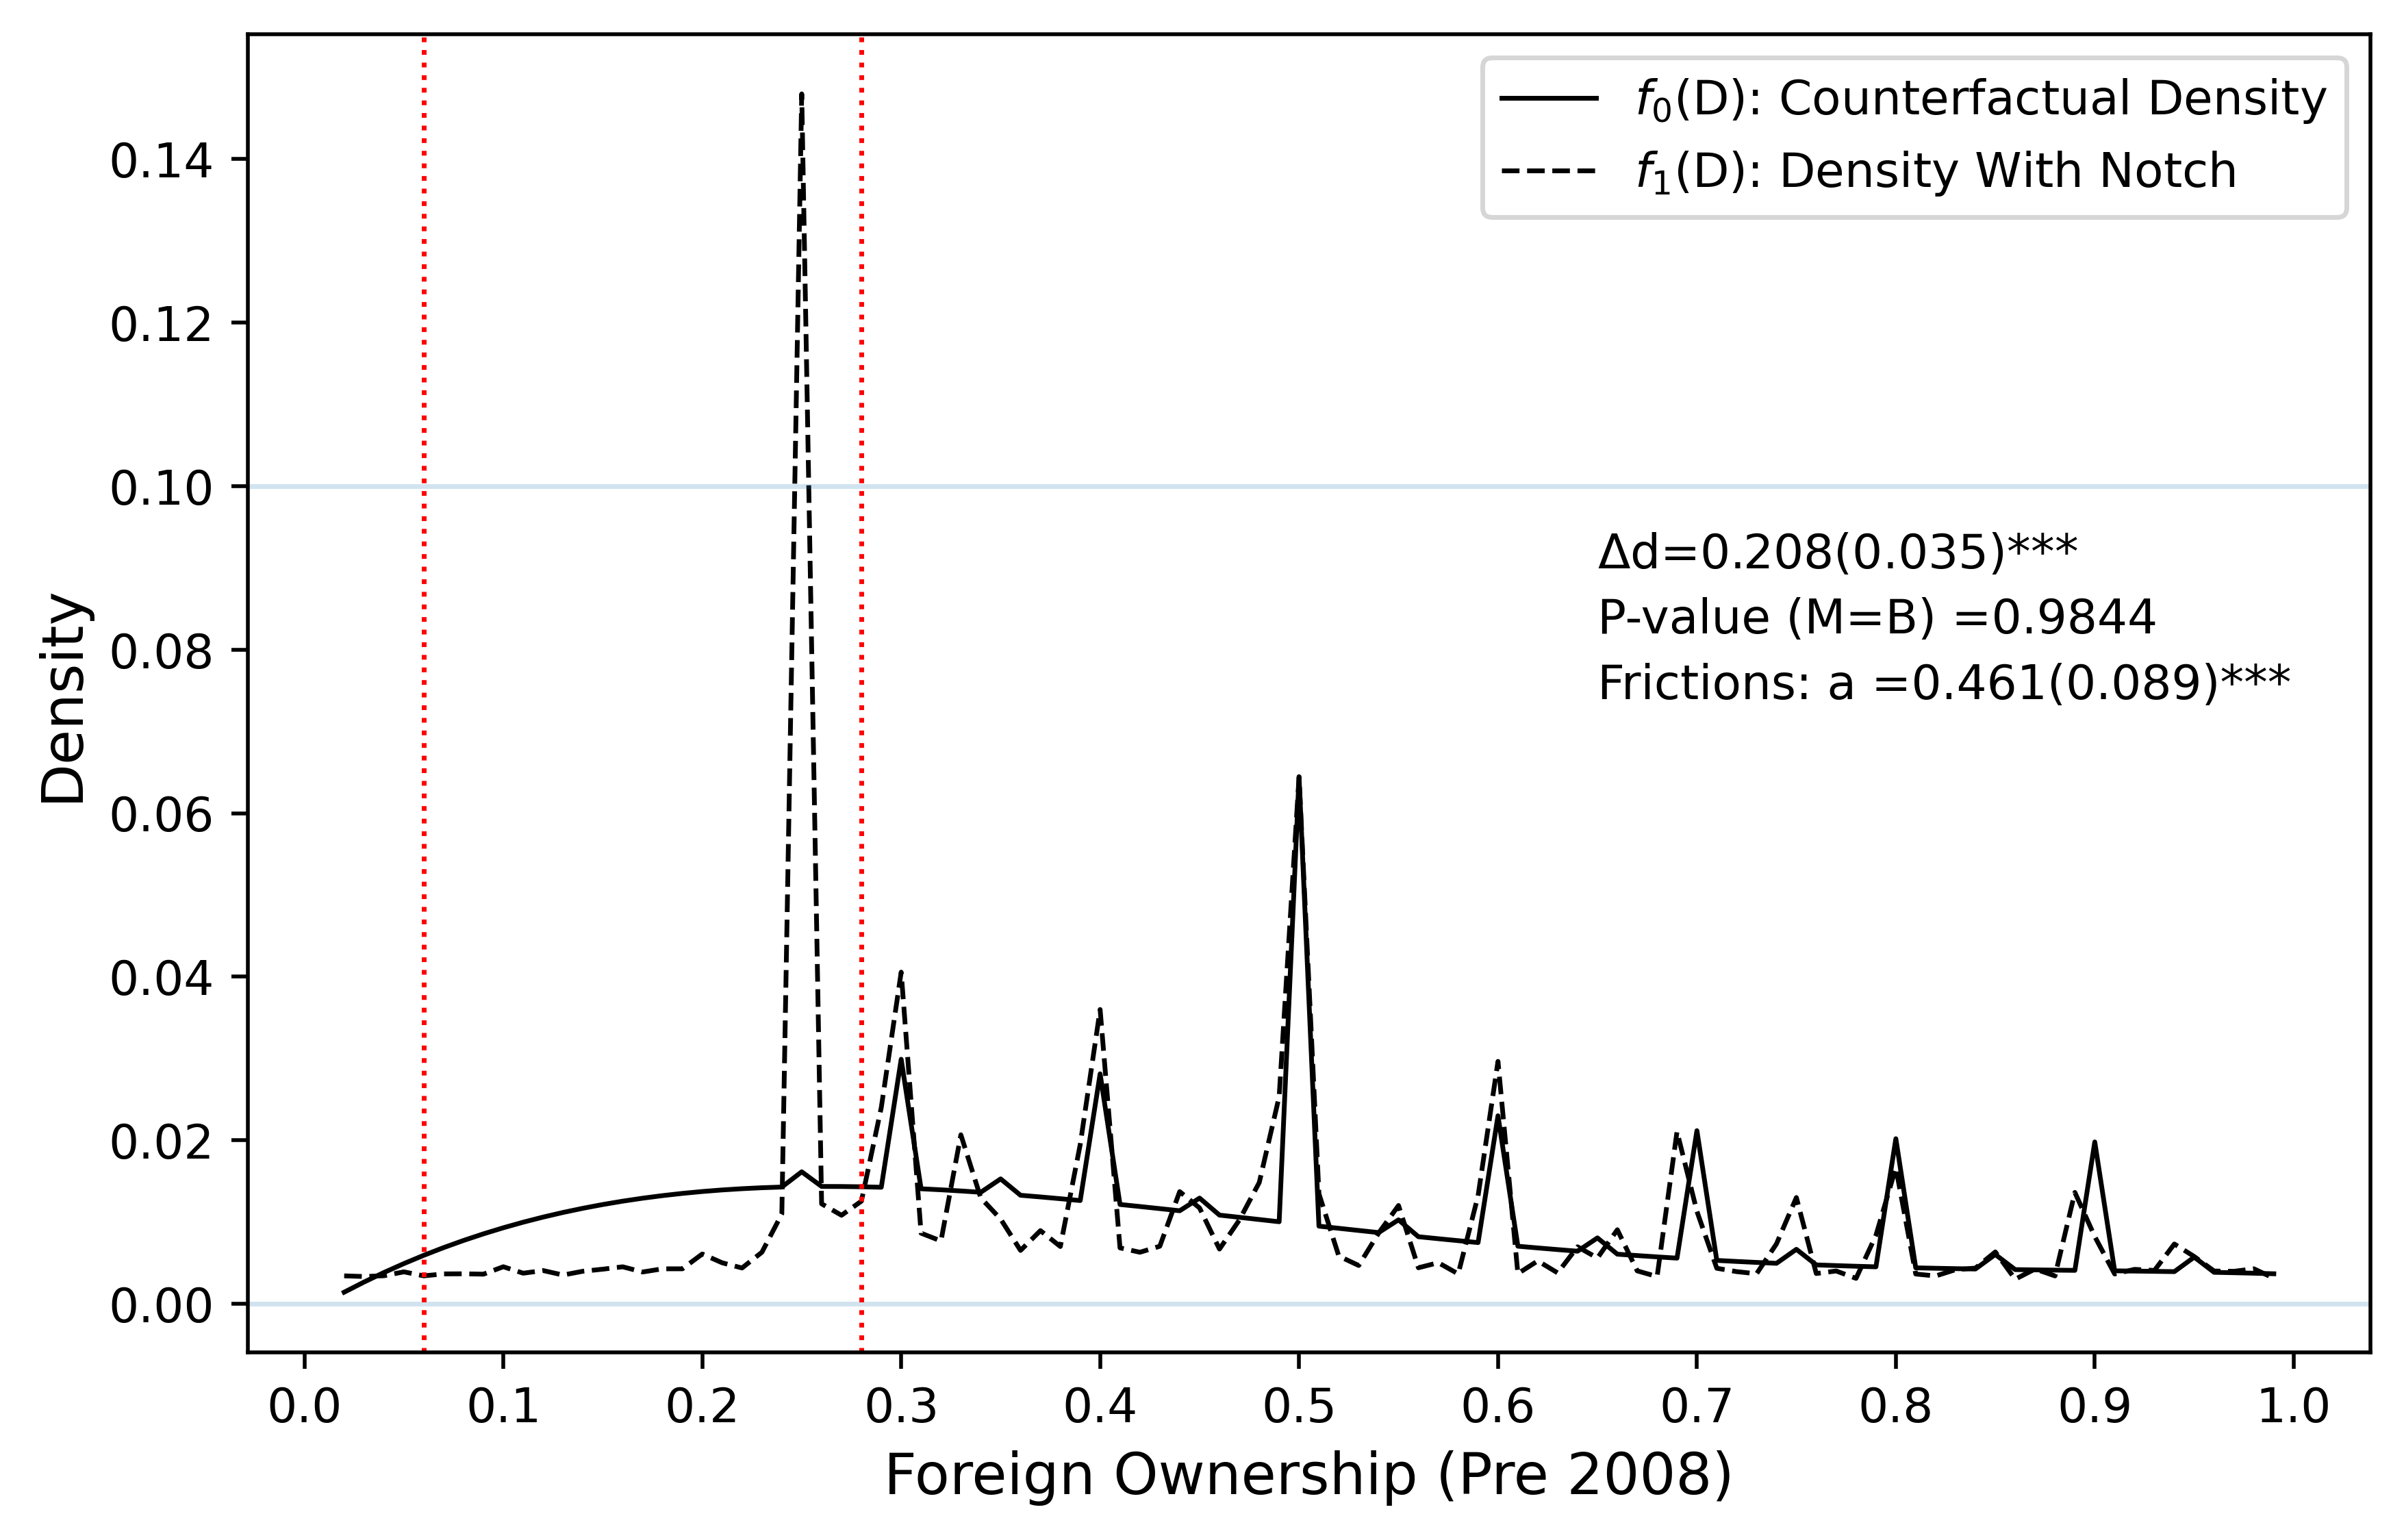

In [9]:
fig2 = get_graph('pre2008June122023')

In [10]:
fig2.savefig(path+'bunching_pre2008.pdf')